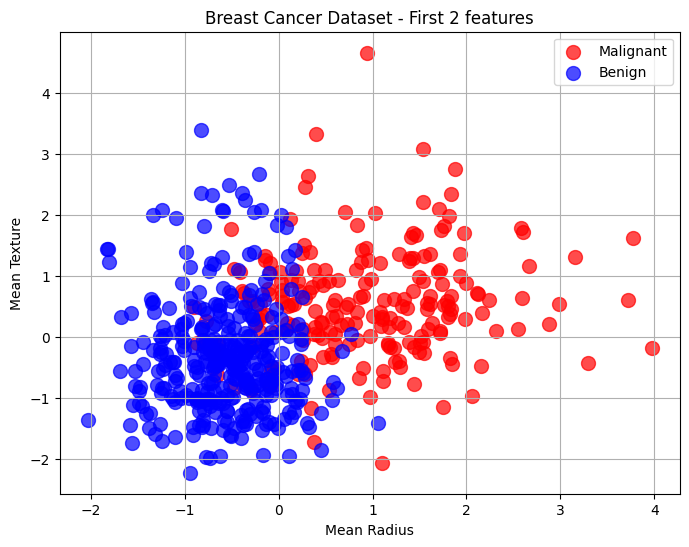

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data 
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Malignant', alpha=0.7, s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Benign', alpha=0.7, s=100)

plt.title("Breast Cancer Dataset - First 2 features")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend()
plt.grid(True)
plt.show()


In [74]:
X.shape

(569, 30)

In [75]:
import numpy as np

class Logistic_Regression:
    def __init__(self, lr=0.001, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.theta = None
        self.bias = None
        self.errs = []

    def sigmoid(self, x):
        x = np.clip(x, -500, 500) 
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, X, y):
        m = len(y)
        predictions = self.forward(X)
        predictions = np.clip(predictions, 1e-10, 1 - 1e-10)
        
        loss = - (1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def compute_gradients(self, X, y):
        m = len(y)
        predictions = self.forward(X)
        
        dtheta = (1/m) * np.dot(X.T, (predictions - y))
        dbias = (1/m) * np.sum(predictions - y)
        return dtheta, dbias

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.theta) + self.bias)

    def train(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.bias = 0
        self.errs = []

        for epoch in range(self.epochs):
            dtheta, dbias = self.compute_gradients(X, y)
            
            self.theta -= self.lr * dtheta
            self.bias -= self.lr * dbias
            
            loss = self.compute_loss(X, y)
            self.errs.append(loss)

    def predict(self, X):
        predictions = self.forward(X)
        return [1 if i >= 0.5 else 0 for i in predictions]

    def plot_err(self):
        errs = self.errs
        plt.scatter([i for i in range(len(errs))],errs)
        plt.title("Errors over epochs")
        plt.show()

    def plot_model(self, X):
        y = np.array(self.predict(X))
 
        plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Malignant', alpha=0.7, s=100)
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Benign', alpha=0.7, s=100)
        
        plt.title("Breast Cancer Dataset - First 2 features")
        plt.xlabel("Mean Radius")
        plt.ylabel("Mean Texture")
        plt.legend()
        plt.grid(True)
        plt.show()
        


In [76]:
model = Logistic_Regression()
model.train(X,y)

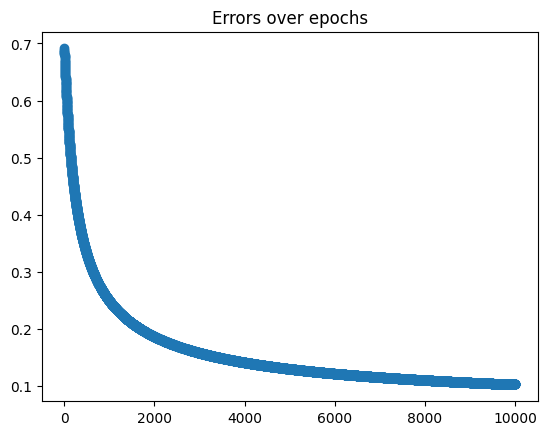

In [77]:
model.plot_err()

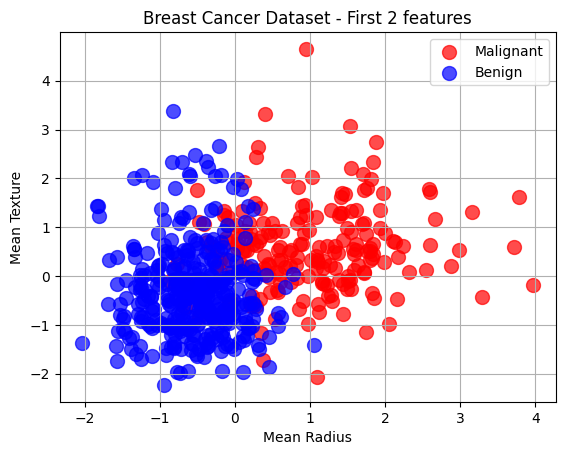

In [78]:
model.plot_model(X)